# Computational Methods Final Project
## Meghan Cilento and Mairead Heiger

### Orbital Motion - Notebook Summary
The main goal of this project is to animate the trajectory of Voyager 1 as well as plot its energy as it travels. We began this project by first plotting and animating different possible orbital trajectories. The purpose of these plots is to explore the initial conditions which produce such trajectories. This creates a foundation on which we were able to plot the known orbits of Jupiter and Saturn, which are necessary in the animation of Voyager 1's trajectory, as Voyager 1 slingshots around these planets on its way out of the solar system.

This notebook contains the code which generated the five possible orbits based on given initial velocity and position. The Runge-Kutta method was used to calculate the position and velocity values at specified constant time steps.  

In [1]:
# Import Statements 

import numpy as np
from math import floor
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython import display
from matplotlib.animation import FuncAnimation
from matplotlib.animation import Animation
from IPython.display import HTML

In [2]:
# Runge-Kutta method used to generate all orbits

def RK4(f, x, t, h):
    """
    Given a function f(x,t) and
    scalars x, t, and h, return x(t+h)
    """
    
    k1 = h*f(x, t)
    k2 = h*f(x + (1/2)*k1, t + (1/2)*h)
    k3 = h*f(x + (1/2)*k2, t + (1/2)*h)
    k4 = h*f(x + k3, t + h)
    
    return x + (1/6)*(k1 + 2*k2 + 2*k3 + k4)

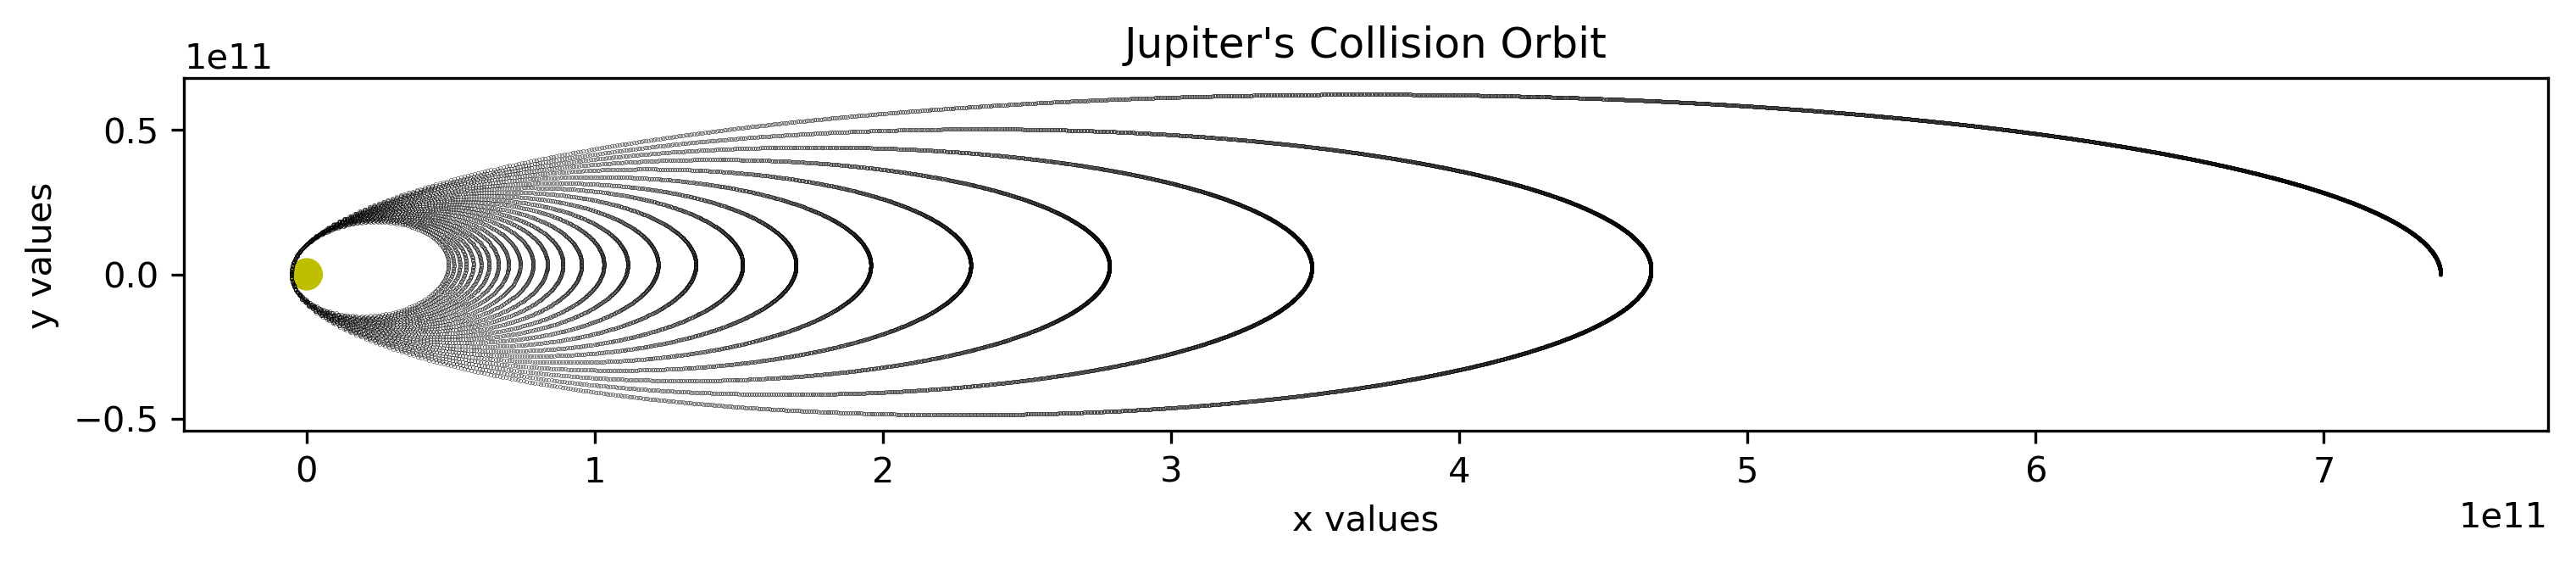

In [3]:
# Plot Jupiter's collision orbit with constant step size

M = 1.9891e30
G = 6.6738e-11

def f(r, t):
    x, y, dxdt, dydt = r
    
    fx = -G*M*x / np.sqrt(x**2 + y**2)**3
    fy = -G*M*y / np.sqrt(x**2 + y**2)**3
    return np.array([dxdt, dydt, fx, fy])

# Initial Conditions
h = 20000
t_values = np.arange(0, 3.475e8+h, h)
x, y, dxdt, dydt = 7.4052e11, 0, 0, 1590


x_values = []
y_values = []
for t in t_values:
    x_values.append(x)
    y_values.append(y)
    
    r = (x, y, dxdt, dydt)
    x, y, dxdt, dydt = RK4(f, r, t, h)


plt.figure(figsize=(12, 10), dpi=300)

sun = plt.Circle((0, 0), 0.005e12, color='y')
ax = plt.gca()
ax.add_artist(sun)

plt.plot(x_values, y_values, 'k.', markersize=0.2)
plt.xlabel('x values')
plt.ylabel('y values')
plt.axis('scaled')
plt.title('Jupiter\'s Collision Orbit')
plt.show()

In [4]:
# Animate Jupiter's collision orbit with constant step size

fig = plt.figure(figsize=(12, 10), dpi=80)
plt.plot(x_values, y_values, color='k', linewidth=1.0)
plt.ylim(-1e11, 1e11)
plt.axis("scaled")
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Jupiter\'s Collision Orbit')

sun = plt.Circle((0, 0), 0.005e12, color='y')
ax = plt.gca()
ax.add_artist(sun)

line1, = plt.plot([], 'o-', color = 'm', label = 'Jupiter')

plt.legend()

def animate(frame):
    
    line1.set_data(x_values[frame*100], y_values[frame*100])
    
    return line1

plt.close()
anim = FuncAnimation(fig, animate, frames = len(x_values)//100, interval = 20)
HTML(anim.to_html5_video())

In [5]:
# Save Jupiter's Collision Orbit Animation
anim.save('Jupiter Collision Orbit.mp4', dpi=200)

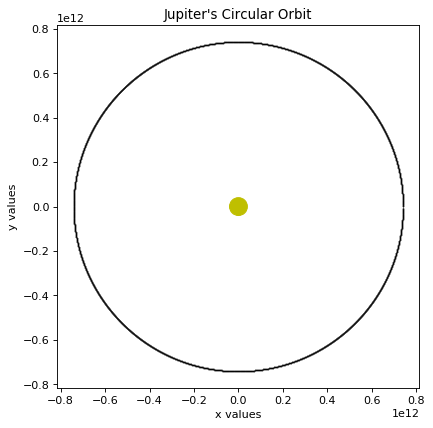

In [6]:
# Plot Jupiter's circular orbit with constant step size

M = 1.9891e30
G = 6.6738e-11

def f(r, t):
    x, y, dxdt, dydt = r
    
    fx = -G*M*x / np.sqrt(x**2 + y**2)**3
    fy = -G*M*y / np.sqrt(x**2 + y**2)**3
    return np.array([dxdt, dydt, fx, fy])

# Initial conditions
h = 20000
t_values = np.arange(0, 3.475e8+h, h)
x, y, dxdt, dydt = 7.4052e11, 0, 0, 13395.28


x_values = []
y_values = []
for t in t_values:
    x_values.append(x)
    y_values.append(y)
    
    r = (x, y, dxdt, dydt)
    x, y, dxdt, dydt = RK4(f, r, t, h)


plt.figure(figsize=(6, 6), dpi=80)

sun = plt.Circle((0, 0), 0.04e12, color='y')
ax = plt.gca()
ax.add_artist(sun)

plt.plot(x_values, y_values, 'k.', markersize=0.1)
plt.xlabel('x values')
plt.ylabel('y values')
plt.axis('scaled')
plt.title('Jupiter\'s Circular Orbit')
plt.show()

In [7]:
# Animate Jupiter's circular orbit with constant step size

fig = plt.figure(figsize=(8, 8))
plt.xlim(-1e12, 1e12)
plt.ylim(-1e12, 1e12)
plt.xlabel('x values')
plt.ylabel('y values')
plt.plot(x_values, y_values, color='k', linewidth=1.0)
plt.title('Jupiter\'s Circular Orbit')

sun = plt.Circle((0, 0), 0.04e12, color='y')
ax = plt.gca()
ax.add_artist(sun)

line1, = plt.plot([], 'o-', color = 'm', label = 'Jupiter')

plt.legend()

def animate(frame):
    
    line1.set_data(x_values[frame*100], y_values[frame*100])
    
    return line1

plt.close()
anim = FuncAnimation(fig, animate, frames = len(x_values)//100, interval = 20)
HTML(anim.to_html5_video())

In [8]:
# Save Jupiter's Circular Orbit Animation
anim.save('Jupiter Circular Orbit.mp4')

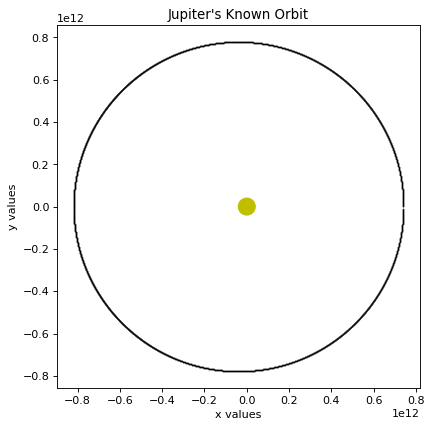

In [9]:
# Plot Jupiter's known orbit with constant step size

M = 1.9891e30
G = 6.6738e-11

def f(r, t):
    x, y, dxdt, dydt = r
    
    fx = -G*M*x / np.sqrt(x**2 + y**2)**3
    fy = -G*M*y / np.sqrt(x**2 + y**2)**3
    return np.array([dxdt, dydt, fx, fy])

# Initial conditions
h = 20000
t_values = np.arange(0, 3.746e8+h, h)      
x, y, dxdt, dydt = 7.4052e11, 0, 0, 13720 


x_values = []
y_values = []
for t in t_values:
    x_values.append(x)
    y_values.append(y)
    
    r = (x, y, dxdt, dydt)
    x, y, dxdt, dydt = RK4(f, r, t, h)


plt.figure(figsize=(6, 6), dpi=80)

sun = plt.Circle((0, 0), 0.04e12, color='y')
ax = plt.gca()
ax.add_artist(sun)

plt.plot(x_values, y_values, 'k.', markersize=0.1)
plt.xlabel('x values')
plt.ylabel('y values')
plt.axis('scaled')
plt.title('Jupiter\'s Known Orbit')
plt.show()

In [10]:
# Animate Jupiter's known orbit with constant step size

fig = plt.figure(figsize=(8, 8))
plt.xlim(-1e12, 1e12)
plt.ylim(-1e12, 1e12)
plt.xlabel('x values')
plt.ylabel('y values')
plt.plot(x_values, y_values, color='k', linewidth=1.0)
plt.title('Jupiter\'s Known Orbit')

sun = plt.Circle((0, 0), 0.04e12, color='y')
ax = plt.gca()
ax.add_artist(sun)

line1, = plt.plot([], 'o-', color = 'm', label = 'Jupiter')

plt.legend()

def animate(frame):
    
    line1.set_data(x_values[frame*100], y_values[frame*100])
    
    return line1

plt.close()
anim = FuncAnimation(fig, animate, frames = len(x_values)//100, interval = 20)
HTML(anim.to_html5_video())

In [11]:
# Save Jupiter's Known Orbit Animation
anim.save('Jupiter Known Orbit.mp4')

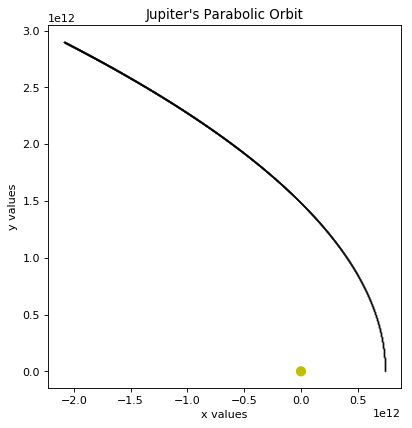

In [12]:
# Plot Jupiter's parabolic orbit with constant step size

M = 1.9891e30
G = 6.6738e-11

def f(r, t):
    x, y, dxdt, dydt = r
    
    fx = -G*M*x / np.sqrt(x**2 + y**2)**3
    fy = -G*M*y / np.sqrt(x**2 + y**2)**3
    return np.array([dxdt, dydt, fx, fy])

# Initial Conditions
h = 20000
t_values = np.arange(0, 3.475e8+h, h)
x, y, dxdt, dydt = 7.4052e11, 0, 0, 18943.787


x_values = []
y_values = []
for t in t_values:
    x_values.append(x)
    y_values.append(y)
    
    r = (x, y, dxdt, dydt)
    x, y, dxdt, dydt = RK4(f, r, t, h)


plt.figure(figsize=(6, 6), dpi=80)

sun = plt.Circle((0, 0), 0.04e12, color='y')
ax = plt.gca()
ax.add_artist(sun)

plt.plot(x_values, y_values, 'k.', markersize=0.055)
plt.xlabel('x values')
plt.ylabel('y values')
plt.axis('scaled')
plt.title('Jupiter\'s Parabolic Orbit')
plt.show()

In [13]:
# Animate Jupiter's parabolic orbit with constant step size

fig = plt.figure(figsize=(6, 6), dpi=80)
plt.plot(x_values, y_values, color='k', linewidth=1.0)
plt.axis("scaled")
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Jupiter\'s Parabolic Orbit')

sun = plt.Circle((0, 0), 0.04e12, color='y')
ax = plt.gca()
ax.add_artist(sun)

line1, = plt.plot([], 'o-', color = 'm', label = 'Jupiter')

plt.legend()

def animate(frame):
    
    line1.set_data(x_values[frame*100], y_values[frame*100])
    
    return line1

plt.close()
anim = FuncAnimation(fig, animate, frames = len(x_values)//100, interval = 20)
HTML(anim.to_html5_video())

In [14]:
# Save Jupiter's Parabolic Orbit Animation
anim.save('Jupiter Parabolic Orbit.mp4')

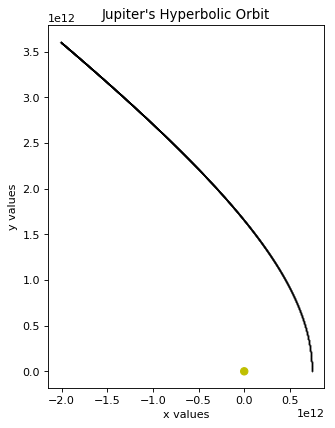

In [15]:
# Plot Jupiter's hyperbolic orbit with constant step size

M = 1.9891e30
G = 6.6738e-11

def f(r2, t):
    x, y, dxdt, dydt = r
    
    fx = -G*M*x / np.sqrt(x**2 + y**2)**3
    fy = -G*M*y / np.sqrt(x**2 + y**2)**3
    return np.array([dxdt, dydt, fx, fy])

#Initial Conditions
h = 20000
t_values = np.arange(0, 3.475e8+h, h)
x, y, dxdt, dydt = 7.4052e11, 0, 0, 20000 

x_values = []
y_values = []
for t in t_values:
    x_values.append(x)
    y_values.append(y)
    
    r = (x, y, dxdt, dydt)
    x, y, dxdt, dydt = RK4(f, r, t, h)


plt.figure(figsize=(6, 6), dpi=80)

sun = plt.Circle((0, 0), 0.04e12, color='y')
ax = plt.gca()
ax.add_artist(sun)

plt.plot(x_values, y_values, 'k.', markersize=0.055)
plt.xlabel('x values')
plt.ylabel('y values')
plt.axis('scaled')
plt.title('Jupiter\'s Hyperbolic Orbit')
plt.show()

In [16]:
# Animate Jupiter's hyperbolic orbit with constant step size

fig = plt.figure(figsize=(6, 6), dpi=80)
plt.plot(x_values, y_values, color='k', linewidth=1.0)
plt.axis("scaled")
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Jupiter\'s Hyperbolic Orbit')

sun = plt.Circle((0, 0), 0.04e12, color='y')
ax = plt.gca()
ax.add_artist(sun)

line1, = plt.plot([], 'o-', color = 'm', label = 'Jupiter')

plt.legend()

def animate(frame):
    
    line1.set_data(x_values[frame*100], y_values[frame*100])
    
    return line1

plt.close()
anim = FuncAnimation(fig, animate, frames = len(x_values)//100, interval = 20)
HTML(anim.to_html5_video())

In [17]:
# Save Jupiter's Hyperbolic Orbit Animation
anim.save('Jupiter Hyperbolic Orbit.mp4')